In [1]:
# Dependencies and Setup

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
import requests
import os
from config import key

In [2]:
# File to Load: Temperature annomaly
temp_annomaly_load = "New - temperature-anomaly.csv"

# Read the international and Canadian GHE data files
tempannomaly_data = pd.read_csv(temp_annomaly_load)

tempannomaly_data.head()

,Entity,Code,Year,Median (℃),Upper (℃),Lower (℃)
0,Global,NaN,1850,-0.373,-0.339,-0.425
1,Global,NaN,1851,-0.218,-0.184,-0.274
2,Global,NaN,1852,-0.228,-0.196,-0.280
3,Global,NaN,1853,-0.269,-0.239,-0.321
4,Global,NaN,1854,-0.248,-0.218,-0.301


In [3]:
# Cleaning the data file: selecting columns and rename columns headers

tempannomaly_data = tempannomaly_data.loc[:,["Year","Entity", "Lower (℃)", "Median (℃)","Upper (℃)"]]

tempannomaly_data = tempannomaly_data.rename(columns={"Entity":"Region", "Lower (℃)": "Lower","Median (℃)": "Median", 
                                                      "Upper (℃)":"Upper"})

tempannomaly_data.head()

,Year,Region,Lower,Median,Upper
0,1850,Global,-0.425,-0.373,-0.339
1,1851,Global,-0.274,-0.218,-0.184
2,1852,Global,-0.280,-0.228,-0.196
3,1853,Global,-0.321,-0.269,-0.239
4,1854,Global,-0.301,-0.248,-0.218


In [4]:
# checking for missing values

tempannomaly_data.describe()

,Year,Lower,Median,Upper
count,676.000000,676.000000,676.000000,676.000000
mean,1934.000000,-0.132722,-0.085948,-0.046824
std,48.821368,0.311442,0.302902,0.300105
min,1850.000000,-0.777000,-0.668000,-0.630000
25%,1892.000000,-0.358250,-0.302500,-0.265000
50%,1934.000000,-0.192000,-0.144500,-0.108500
75%,1976.000000,0.035000,0.065000,0.089750
max,2018.000000,1.027000,1.064000,1.096000


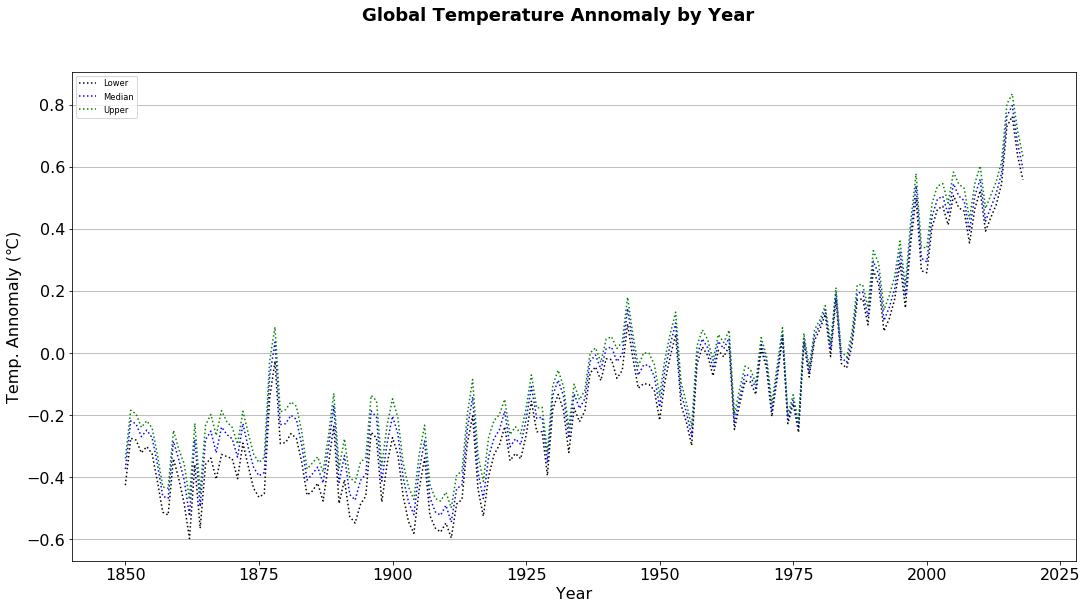

In [5]:
# Plot Global trend

# Filtering data frame for Global values only
tempannomaly_global = tempannomaly_data.loc[tempannomaly_data["Region"] == "Global", :]

# Plot
fig, (ax1) = plt.subplots()
#fig.set_size_inches(15, 7)
fig.suptitle("Global Temperature Annomaly by Year", fontsize=16, fontweight="bold",size=18)

ax1.set_xlim(min(tempannomaly_global["Year"]-10), max(tempannomaly_global["Year"]+10))
ax1.plot(tempannomaly_global["Year"], tempannomaly_global["Lower"],color="black", 
         linestyle = ":", label = "Lower")

ax1.plot(tempannomaly_global["Year"], tempannomaly_global["Median"],color="blue", 
         linestyle = ":", Label = "Median")

ax1.plot(tempannomaly_global["Year"], tempannomaly_global["Upper"],color="green", 
         linestyle = ":", Label = "Upper")

ax1.set_ylabel("Temp. Annomaly (℃)",size=16)
ax1.set_xlabel("Year",size=16)
fig.set_figheight(9)
fig.set_figwidth(18)
plt.xticks(size=16)
plt.yticks(size=16)
ax1.yaxis.grid()

plt.legend(loc="best", fontsize="small", fancybox=True)

plt.savefig("Temp_Annomaly.png")

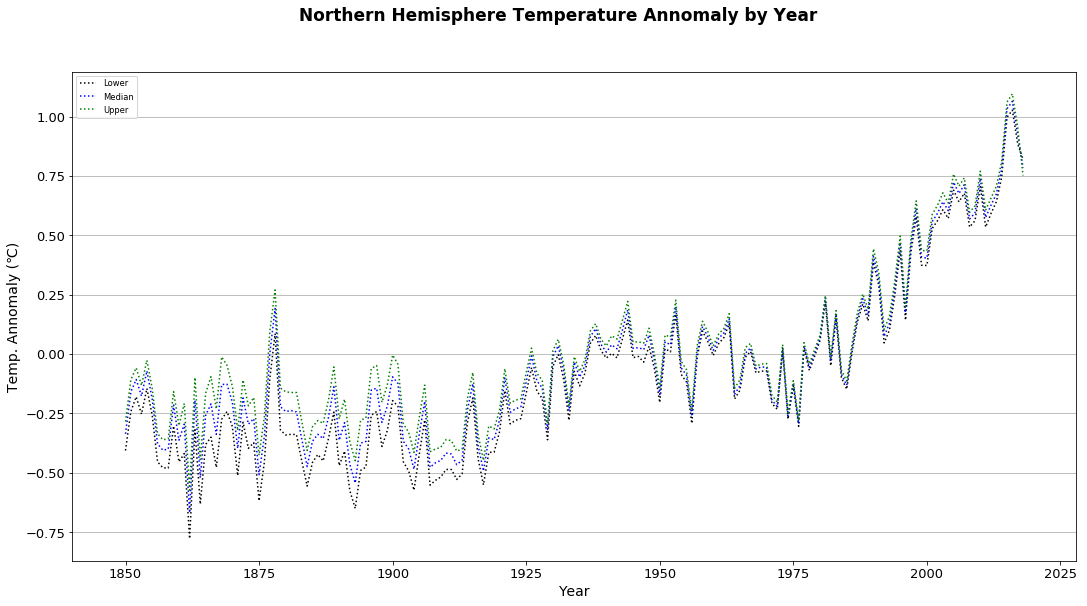

In [116]:
# Plot Northern Hemisphere trend

# Filtering data frame for Global values only
tempannomaly_northern = tempannomaly_data.loc[tempannomaly_data["Region"] == "Northern Hemisphere", :]

# Plot
fig, (ax2) = plt.subplots()
#fig.set_size_inches(18.5, 10.5)
fig.suptitle("Northern Hemisphere Temperature Annomaly by Year", fontsize=16, fontweight="bold",size=17)

ax2.set_xlim(min(tempannomaly_northern["Year"]-10), max(tempannomaly_northern["Year"]+10))
ax2.plot(tempannomaly_northern["Year"], tempannomaly_northern["Lower"],color="black", 
         linestyle = ":", label = "Lower")

ax2.plot(tempannomaly_northern["Year"], tempannomaly_northern["Median"],color="blue", 
         linestyle = ":", Label = "Median")

ax2.plot(tempannomaly_northern["Year"], tempannomaly_northern["Upper"],color="green", 
         linestyle = ":", Label = "Upper")

ax2.set_ylabel("Temp. Annomaly (℃)",size=14)
ax2.set_xlabel("Year",size=14)
fig.set_figheight(9)
fig.set_figwidth(18)
plt.xticks(size=13)
plt.yticks(size=13)
ax2.yaxis.grid()


plt.legend(loc="best", fontsize="small", fancybox=True)


plt.savefig("Northern_Annomaly.png")

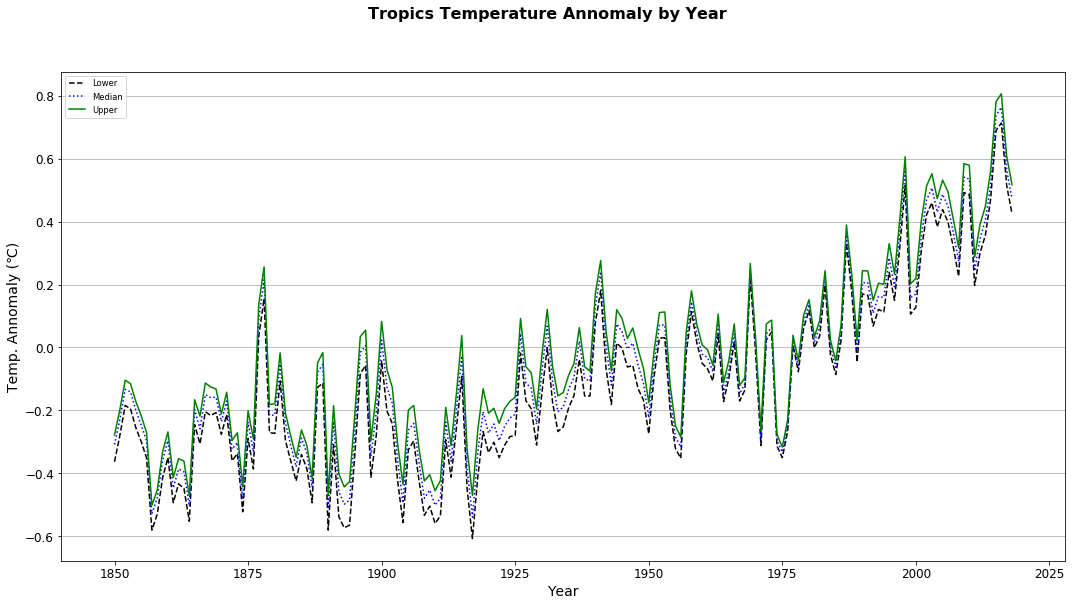

In [6]:
# Plot Tropics trend

# Filtering data frame for Global values only
tempannomaly_tropics = tempannomaly_data.loc[tempannomaly_data["Region"] == "Tropics", :]

# Plotx`
fig, (ax3) = plt.subplots()
#fig.set_size_inches(18.5, 10.5)
fig.suptitle("Tropics Temperature Annomaly by Year", fontsize=16, fontweight="bold",size=16)

ax3.set_xlim(min(tempannomaly_tropics["Year"]-10), max(tempannomaly_tropics["Year"]+10))
ax3.plot(tempannomaly_tropics["Year"], tempannomaly_tropics["Lower"],color="black", 
         linestyle = "--", label = "Lower")

ax3.plot(tempannomaly_tropics["Year"], tempannomaly_tropics["Median"],color="blue", 
         linestyle = ":", Label = "Median")

ax3.plot(tempannomaly_tropics["Year"], tempannomaly_tropics["Upper"],color="green", Label = "Upper")

ax3.set_ylabel("Temp. Annomaly (℃)",size=14)
ax3.set_xlabel("Year",size=14)
fig.set_figheight(9)
fig.set_figwidth(18)
plt.xticks(size=12)
plt.yticks(size=12)
ax3.yaxis.grid()

plt.legend(loc="best", fontsize="small", fancybox=True)
plt.savefig("Tropics_Annomaly.png")

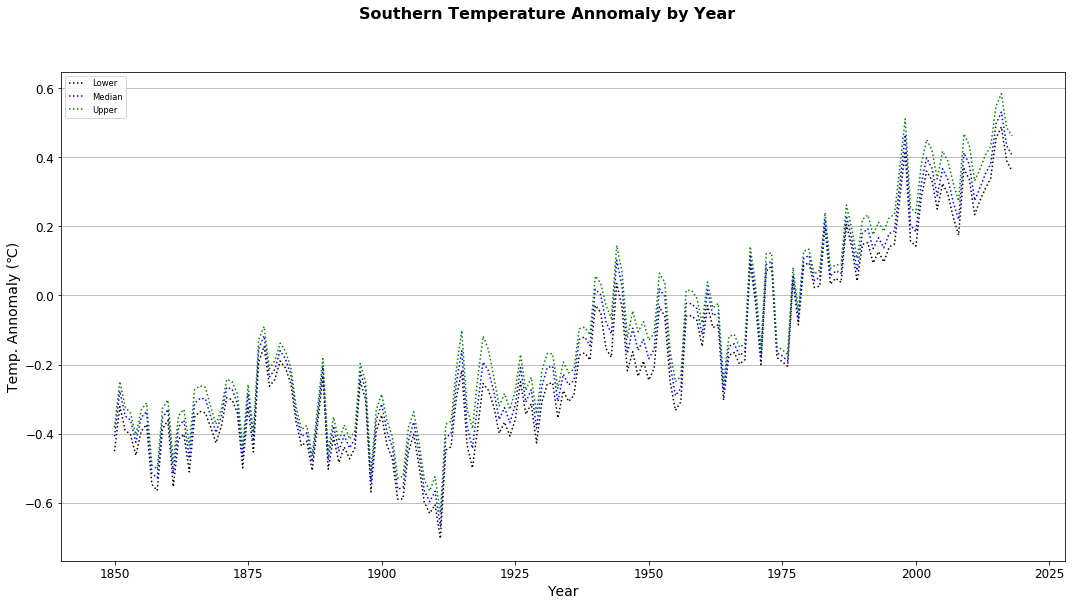

In [7]:
# Plot Southern Hemisphere trend

# Filtering data frame for southern hemisphere values only
tempannomaly_southern = tempannomaly_data.loc[tempannomaly_data["Region"] == "Southern Hemisphere", :]

# Plot
fig, (ax4) = plt.subplots()
#fig.set_size_inches(18.5, 10.5)
fig.suptitle("Southern Temperature Annomaly by Year", fontsize=16, fontweight="bold")

ax4.set_xlim(min(tempannomaly_southern["Year"]-10), max(tempannomaly_southern["Year"]+10))
ax4.plot(tempannomaly_southern["Year"], tempannomaly_southern["Lower"],color="black", 
         linestyle = ":", label = "Lower")

ax4.plot(tempannomaly_southern["Year"], tempannomaly_southern["Median"],color="blue", 
         linestyle = ":", Label = "Median")

ax4.plot(tempannomaly_southern["Year"], tempannomaly_southern["Upper"],color="green", 
         linestyle = ":", Label = "Upper")

ax4.set_ylabel("Temp. Annomaly (℃)",size=14)
ax4.set_xlabel("Year",size=14)
fig.set_figheight(9)
fig.set_figwidth(18)
plt.xticks(size=12)
plt.yticks(size=12)
ax4.yaxis.grid()


plt.legend(loc="best", fontsize="small", fancybox=True)

plt.savefig("Southern_Annomaly.png")

In [8]:
tempannomaly_northern

NameError: name 'tempannomaly_northern' is not defined

NameError: name 'tempannomaly_northern' is not defined

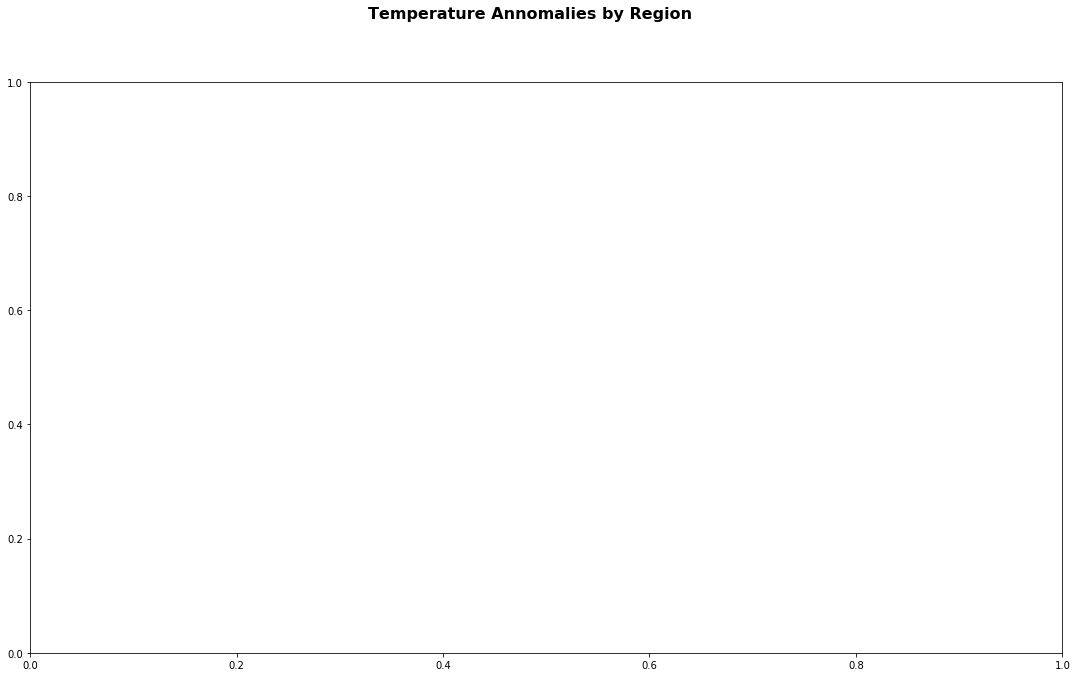

In [9]:
# Generating dataframes for 3 regions and to plot the mean temprature annomaly by region


# Plot
fig, (ax2) = plt.subplots()
fig.suptitle("Temperature Annomalies by Region", fontsize=16, fontweight="bold")
fig.set_size_inches(18.5, 10.5)

ax2.plot(tempannomaly_northern["Year"], tempannomaly_northern["Median"],color="black",linestyle = ":",label = "Northern Hemisphere")

ax2.plot(tempannomaly_tropics["Year"], tempannomaly_tropics["Median"],color="green", 
         linestyle = ":", label = "Tropics")

ax2.plot(tempannomaly_southern["Year"], tempannomaly_southern["Median"],color="red", 
         linestyle = ":", label = "Southern Hemisphere")

ax2.set_ylabel("Temp. Annomaly (℃)",size=14)
ax2.set_xlabel("Year",size=14)
ax2.yaxis.grid()
fig.set_figheight(9)
fig.set_figwidth(18)
plt.xticks(size=12)
plt.yticks(size=12)

plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the plot

plt.savefig("Region_Temp_Annomaly.png")

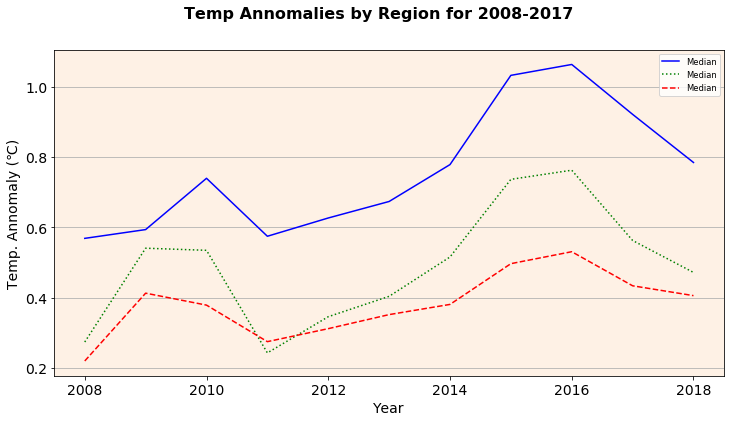

In [126]:
# Generating dataframes for 3 regions and only for 2000 and onwards

# Filtering data frame for each region and year >= 2000
restricted_northern = tempannomaly_northern.loc[tempannomaly_northern["Year"] >= 2008, :]
restricted_tropics = tempannomaly_tropics.loc[tempannomaly_tropics["Year"] >= 2008, :]
restricted_southern = tempannomaly_southern.loc[tempannomaly_southern["Year"] >= 2008, :]


# Plot
fig, (ax2) = plt.subplots()
fig.suptitle("Temp Annomalies by Region for 2008-2017", fontsize=16, fontweight="bold",size=16)
#fig.set_size_inches(18.5, 10.5)

ax2.plot(restricted_northern["Year"], restricted_northern["Median"],color="blue", Label = "Northern Hemisphere")

ax2.plot(restricted_tropics["Year"], restricted_tropics["Median"],color="green", 
         linestyle = ":", Label = "Tropics")

ax2.plot(restricted_southern["Year"], restricted_southern["Median"],color="red", 
         linestyle = "--", Label = "Southern Hemisphere")

ax2.set_ylabel("Temp. Annomaly (℃)",size=14)
ax2.set_xlabel("Year",size=14)

plt.legend(loc="best", fontsize="small", fancybox=True)
ax2.yaxis.grid()
ax2.set_facecolor(color='#FEF1E5')
fig.set_figheight(6)
fig.set_figwidth(12)

# Save the plot
plt.xticks(size=14)
plt.yticks(size=14)
plt.savefig("Region_Temp_Annomaly.png")
plt.show()

# Setting up API from meteostat for the 4 localities (https://api.meteostat.net/): Toronto, Murmansk, Singapore and Sidney (Australia)

In [11]:
# Setting up the dates and station

#dates of weather information query (2008-2018)

start_date_month = '2008-01'
end_date_month = '2018-12'
#url structure = https://api.meteostat.net/{VERSION}/{PACKAGE}/{METHOD}?{PARAMETERS}
#https://api.meteostat.net/v1/history/hourly?station=03772&start=2019-05-02&end=2019-05-11&time_zone=Europe/London&time_format=Y-m-d%20H:i&key=XXXXXXXX
#https://api.meteostat.net/v1/history/daily?station=10637&start=2017-01-01&end=2017-12-31&key=XXXXXXXX
#station ids: 22113 - Murmansk, 48698 - Singapore, 94767 - Sydney, 71508 - Toronto

# Setting stations numbers for Toronto, Singapore, Murmansk and Sidney (Australia)

station_id = ['22113','48698', '94767', '71508']

# Reading  csv file with historical 30 year mean temperature record for the 4 localities

csv=["Murmansk.csv", "Singapore.csv", "Australia.csv","Toronto.csv"]

historyparams_monthly ={
    'start':start_date_month,
    'end':end_date_month,
    'key':key
    }

# Intiializing a list with the same length as the the number of stations 
# Data_ls will carry a list of the dates for the 132 months
# Temp_mean_ls will carry a list of the temperatures for the 132 months

date_ls = [0] * len(station_id)
temp_mean_ls = [0] * len(station_id)
y=0
for i in station_id:
    qry_monthly_url = f'https://api.meteostat.net/v1/history/monthly?station={i}'
    history_monthly = requests.get(qry_monthly_url,params=historyparams_monthly).json()
    # This will turn the previously initialized list into a list of lists, so for example with three station ids
    date_ls[y] = []
    temp_mean_ls[y] = []
    # for loop working through the data to find the mean monthly temperatures, and then appending the lists to fill that data
    for x in range(len(history_monthly["data"])):
        date_ls[y].append(history_monthly['data'][x]['month'])
        temp_mean_ls[y].append(history_monthly['data'][x]['temperature_mean'])
    # Double checking lengths to make sure they are all the same (for 11 years should be 132 months)
    print(f"{len(date_ls[y])},{len(temp_mean_ls[y])}")
    y=y+1



132,132
132,132
132,132
132,132


In [12]:
# Generating dataframe with mean temperature for eaach of the stations
# Initializing empty list of the same length as the number of stations
temp=[0]* len(station_id)
means=[0] * len(station_id)
dates= [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
for y in range(len(station_id)):
#     initializing each individual element in the previous list as lists to create a list of lists
    temp[y]=[]
    means[y]=[]
    for i in range(11):
        begin=11*i
        end=11*(i+1)
#         Stored monthly temperature for each year in a list in temp[y]
        temp[y].append(temp_mean_ls[y][begin:end])
#        Determined the average of that list to find the average annual temperature
        means[y].append(np.mean(temp[y][i]))
# initializing a dataframe to hold the annual temperatures and years
df2 = pd.DataFrame(dates)
y=0
# Add annual averages for each station into the data frame as a separate column
for i in station_id:
    df2[f'tempannual{i}'] = means[y]
    y=y+1
df2

,0,tempannual22113,tempannual48698,tempannual94767,tempannual71508
0,2008,1.527273,27.536364,17.572727,10.336364
1,2009,1.418182,27.954545,18.381818,9.181818
2,2010,0.545455,28.090909,18.818182,10.745455
3,2011,-0.045455,27.681818,18.700000,8.681818
4,2012,1.300000,27.445455,18.745455,10.727273
5,2013,0.381818,27.690909,19.472727,8.745455
6,2014,1.300000,27.509091,20.145455,7.100000
7,2015,1.300000,27.945455,19.509091,7.672727
8,2016,1.790909,28.481818,19.254545,10.990909
9,2017,3.427273,28.127273,19.600000,11.809091


In [13]:
# This cell reads the csv data and finds the 30 year average of each city 
print(os.getcwd())
# Initialize empty lists
df = [0]*len(station_id)
thirtyyearavg = [0]*len(station_id)
y=0
for i in csv:
#     read csv data
    data = pd.read_csv(i) 
    df[y] = data.loc[(data["Year"] >= 1970) & (data["Year"] <= 2000)]
    #locate by key 
#     Clean up data to remove years with no data
    df[y] = df[y].loc[df[y]["T"]!='-',:]
#     turns column 'T' into a float
    df[y]["T"] = pd.to_numeric(df[y]["T"])
#     Finds the average of column 'T'
    thirtyyearavg[y]= np.mean(df[y]["T"])
    y=y+1
    
    

C:\Users\angie\git\GitHub\Project-1\Reference\Master Jupyter


C:\Users\angie\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [15]:
#     This cell finds the temperature anomaly by calculating the difference between the annual temperature and the 30 year baseline
y=0
for i in station_id:
    df2[f"Anomaly{i}"]= df2[f"tempannual{i}"]-thirtyyearavg[y]
    y=y+1


In [16]:
# df2.columns=["Year","tempannual","anomaly"]
df2

,0,tempannual22113,tempannual48698,tempannual94767,tempannual71508,Anomaly22113,Anomaly48698,Anomaly94767,Anomaly71508
0,2008,1.527273,27.536364,17.572727,10.336364,1.295130,0.344056,-0.191273,2.210048
1,2009,1.418182,27.954545,18.381818,9.181818,1.186039,0.762238,0.617818,1.055502
2,2010,0.545455,28.090909,18.818182,10.745455,0.313312,0.898601,1.054182,2.619139
3,2011,-0.045455,27.681818,18.700000,8.681818,-0.277597,0.489510,0.936000,0.555502
4,2012,1.300000,27.445455,18.745455,10.727273,1.067857,0.253147,0.981455,2.600957
5,2013,0.381818,27.690909,19.472727,8.745455,0.149675,0.498601,1.708727,0.619139
6,2014,1.300000,27.509091,20.145455,7.100000,1.067857,0.316783,2.381455,-1.026316
7,2015,1.300000,27.945455,19.509091,7.672727,1.067857,0.753147,1.745091,-0.453589
8,2016,1.790909,28.481818,19.254545,10.990909,1.558766,1.289510,1.490545,2.864593
9,2017,3.427273,28.127273,19.600000,11.809091,3.195130,0.934965,1.836000,3.682775


In [17]:
# Renaming columns in the dataframe


df2 = df2.rename(columns={"tempannual22113":"Temp Average Murmansk", "tempannual48698": "Temp Average Singapore",
                          "tempannual94767": "Temp Average Sidney", "tempannual71508": "Temp Average Toronto",
                          "Anomaly22113":"Temp Anomaly Murmansk", "Anomaly48698":"Temp Anomaly Singapore",
                          "Anomaly94767":"Temp Anomaly Sidney", "Anomaly71508":"Temp Anomaly Toronto"})
df2.head()

,0,Temp Average Murmansk,Temp Average Singapore,Temp Average Sidney,Temp Average Toronto,Temp Anomaly Murmansk,Temp Anomaly Singapore,Temp Anomaly Sidney,Temp Anomaly Toronto
0,2008,1.527273,27.536364,17.572727,10.336364,1.295130,0.344056,-0.191273,2.210048
1,2009,1.418182,27.954545,18.381818,9.181818,1.186039,0.762238,0.617818,1.055502
2,2010,0.545455,28.090909,18.818182,10.745455,0.313312,0.898601,1.054182,2.619139
3,2011,-0.045455,27.681818,18.700000,8.681818,-0.277597,0.489510,0.936000,0.555502
4,2012,1.300000,27.445455,18.745455,10.727273,1.067857,0.253147,0.981455,2.600957


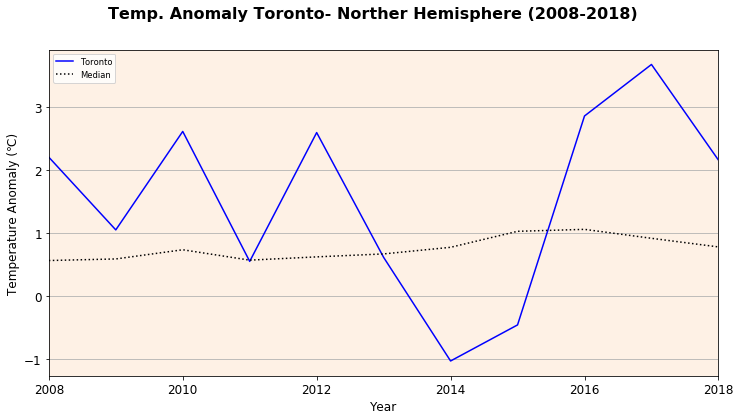

In [81]:
# Plot temperature anomaly data for Toronto, Canada
# You must manually edit the section to customize data plot
# X is just a variable holding the indepedent variable (x-axis data)
x = df2[0]
fig, ax1 = plt.subplots()
#fig.set_size_inches(18.5, 10.5)
fig.suptitle("Temp. Anomaly Toronto- Norther Hemisphere (2008-2018)", fontsize=12, fontweight="bold",size=16)

ax1.set_xlim(min(df2[0]), max(df2[0]))

#ax1.plot(x, df2["Temp Anomaly Murmansk"],color="black", label = "Murmansk", linestyle = ":")
#ax1.plot(x, df2["Temp Anomaly Singapore"],color="red", label = "Singapore", linestyle = ":")
#ax1.plot(x, df2["Temp Anomaly Sidney"],color="green", label = "Sidney", linestyle = ":")
ax1.plot(x, df2["Temp Anomaly Toronto"],color="blue", label = "Toronto")
ax1.plot(restricted_northern["Year"], restricted_northern["Median"],color="black", 
         linestyle = ":", Label = "Northern Hemisphere")

ax1.set_ylabel("Temperature Anomaly (℃)",size=12)
ax1.set_xlabel("Year",size=12)
ax1.set_facecolor(color='#FEF1E5')
fig.set_figheight(6)
fig.set_figwidth(12)
ax1.yaxis.grid()
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend(loc="best", fontsize="small", fancybox=True)

plt.savefig("Toronto_Northern.png")


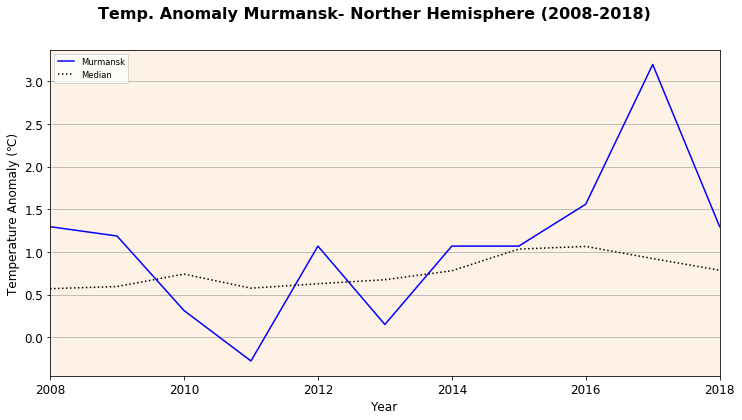

In [80]:
# Plot temperature anomaly data for Murmansk, Rusia
# You must manually edit the section if there are more axes than 
x = df2[0]
fig, ax1 = plt.subplots()
#fig.set_size_inches(18.5, 10.5)
fig.suptitle("Temp. Anomaly Murmansk- Norther Hemisphere (2008-2018)", fontsize=12, fontweight="bold",size=16)

ax1.set_xlim(min(df2[0]), max(df2[0]))

ax1.plot(x, df2["Temp Anomaly Murmansk"],color="blue", label = "Murmansk")
#ax1.plot(x, df2["Temp Anomaly Singapore"],color="red", label = "Singapore", linestyle = ":")
#ax1.plot(x, df2["Temp Anomaly Sidney"],color="green", label = "Sidney", linestyle = ":")
#ax1.plot(x, df2["Temp Anomaly Toronto"],color="blue", label = "Toronto", linestyle = ":")
ax1.plot(restricted_northern["Year"], restricted_northern["Median"],color="black", 
         linestyle = ":", Label = "Northern Hemisphere")

ax1.set_ylabel("Temperature Anomaly (℃)",size=12)
ax1.set_xlabel("Year",size=12)
ax1.set_facecolor(color='#FEF1E5')
fig.set_figheight(6)
fig.set_figwidth(12)
ax1.yaxis.grid()
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend(loc="best", fontsize="small", fancybox=True)

plt.savefig("Murmansk_Northern.png")

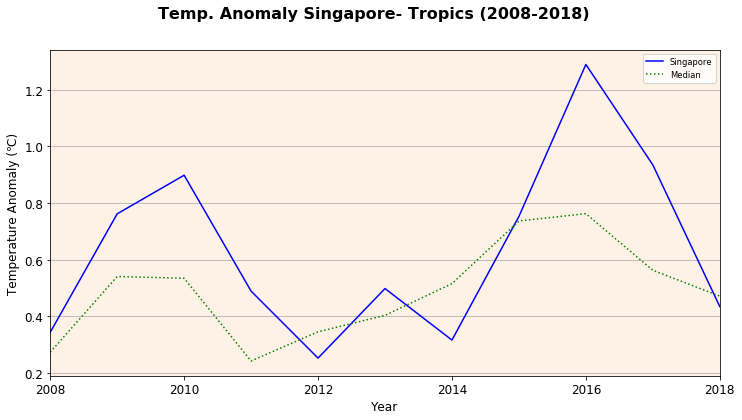

In [79]:
# Plot temperature anomaly data for Singapore
# You must manually edit the section if there are more axes than 
x = df2[0]
fig, ax1 = plt.subplots()
#fig.set_size_inches(18.5, 10.5)
fig.suptitle("Temp. Anomaly Singapore- Tropics (2008-2018)", fontsize=12, fontweight="bold",size=16)

ax1.set_xlim(min(df2[0]), max(df2[0]))

#ax1.plot(x, df2["Temp Anomaly Murmansk"],color="blue", label = "Murmansk", linestyle = ":")
ax1.plot(x, df2["Temp Anomaly Singapore"],color="b", label = "Singapore")
#ax1.plot(x, df2["Temp Anomaly Sidney"],color="green", label = "Sidney", linestyle = ":")
#ax1.plot(x, df2["Temp Anomaly Toronto"],color="blue", label = "Toronto", linestyle = ":")
ax1.plot(restricted_tropics["Year"], restricted_tropics["Median"],color="green", 
         linestyle = ":", Label = "Tropics")

ax1.set_ylabel("Temperature Anomaly (℃)",size=12)
ax1.set_xlabel("Year",size=12)
ax1.set_facecolor(color='#FEF1E5')
fig.set_figheight(6)
fig.set_figwidth(12)
ax1.yaxis.grid()
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend(loc="best", fontsize="small", fancybox=True)

plt.savefig("Singapore_Tropics.png")

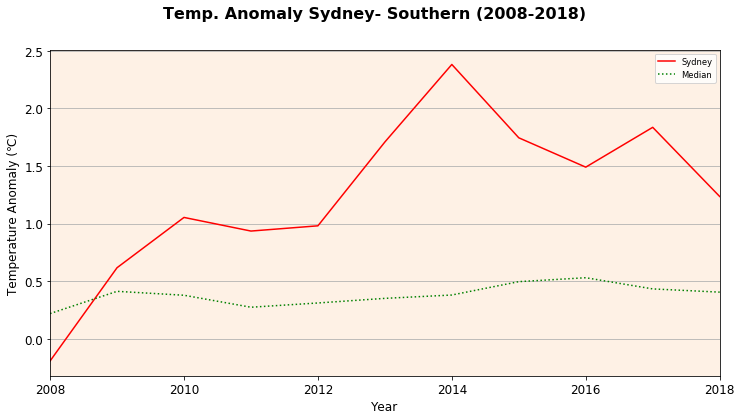

In [78]:
# Plot temperature anomaly data for Sidney
# You must manually edit the section if there are more axes than 
x = df2[0]
fig, ax1 = plt.subplots()
#fig.set_size_inches(18.5, 10.5)
fig.suptitle("Temp. Anomaly Sydney- Southern (2008-2018)", fontsize=12, fontweight="bold",size=16)

ax1.set_xlim(min(df2[0]), max(df2[0]))

#ax1.plot(x, df2["Temp Anomaly Murmansk"],color="blue", label = "Murmansk", linestyle = ":")
#ax1.plot(x, df2["Temp Anomaly Singapore"],color="blue", label = "Singapore", linestyle = ":")
ax1.plot(x, df2["Temp Anomaly Sidney"],color="red", label = "Sydney")
#ax1.plot(x, df2["Temp Anomaly Toronto"],color="blue", label = "Toronto", linestyle = ":")
ax1.plot(restricted_southern["Year"], restricted_southern["Median"],color="green", 
         linestyle = ":", Label = "Tropics")

ax1.set_ylabel("Temperature Anomaly (℃)",size=12)
ax1.set_xlabel("Year",size=12)
ax1.set_facecolor(color='#FEF1E5')
fig.set_figheight(6)
fig.set_figwidth(12)
ax1.yaxis.grid()
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend(loc="best", fontsize="small", fancybox=True)

plt.savefig("Sidney_Southern.png")

In [26]:
# Although unused our data this cells grabs 48 years of data from each of the cities, and creates a list of data frames.
# The lists name is data2
data2 = [0] * len(csv)
y=0
# below is code for reading csv's and generating list of dataframes
for i in csv:
    data= pd.read_csv(i) 
    data2[y] = data.loc[(data["Year"] >= 1970) & (data["Year"] <= 2018)]
    data2[y]=data2[y].loc[data2[y]["T"]!='-',:]
    y=y+1


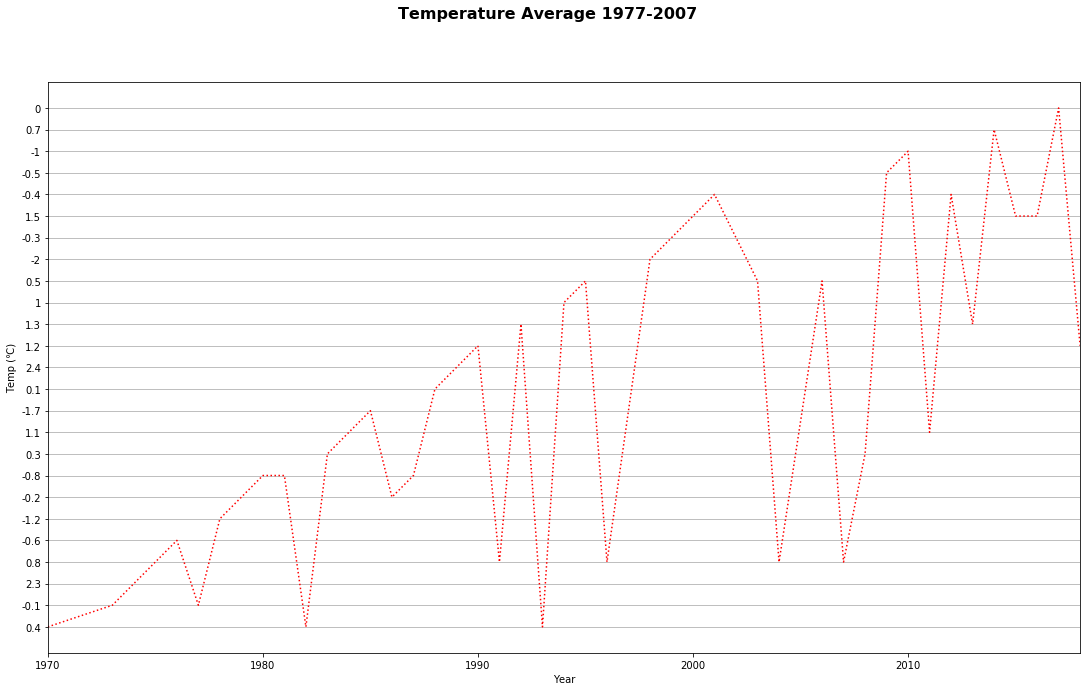

In [124]:
# These figures although unused in our powerpoint, are a plot of the 48 year annual temperature in Murmansk
fig, ax1 = plt.subplots()

x = data2[0]["Year"]


fig.set_size_inches(18.5, 10.5)
fig.suptitle("Temperature Average 1977-2007", fontsize=16, fontweight="bold")
ax1.set_xlim(1970, 2018)
ax1.plot(x, data2[0]["T"],color="r", linestyle = ":", label = "Murmansk")
ax1.set_ylabel("Temp (℃)")
ax1.set_xlabel("Year")
ax1.yaxis.grid()

# Save the plot

plt.savefig("murmansk 30 years.png")

In [ ]:
#EOF